# The comparison codes

### Putting info here

In [1]:
# To adjust ne file

# import os

# def increment_ne_values(file_path, increment=1.0, output_file=None):
#     # Use same file for output if not provided (overwrite)
#     if output_file is None:
#         output_file = file_path

#     # Read input file
#     with open(file_path, 'r') as f:
#         lines = f.readlines()

#     # Parse first line: number of data rows
#     try:
#         num_rows = int(lines[0].strip())
#     except ValueError:
#         raise ValueError("First line must be an integer representing the number of data rows.")

#     if len(lines) - 1 != num_rows:
#         raise ValueError("Mismatch between row count and actual number of data lines.")

#     # Process data lines
#     updated_lines = [lines[0]]  # Keep header unchanged

#     for line in lines[1:]:
#         parts = line.strip().split()
#         if len(parts) != 2:
#             raise ValueError(f"Invalid data format in line: {line.strip()}")

#         x_val = float(parts[0])
#         ne_val = float(parts[1]) + increment

#         updated_lines.append(f"{x_val} {ne_val}\n")

#     # Write updated content
#     with open(output_file, 'w') as f:
#         f.writelines(updated_lines)

#     print(f"Updated file written to: {output_file}")





# dir_cyl  = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
# dir_cart = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty"
# filename = "ORIGINAL ne_189998_3000ms_quinn.dat"
# increment_value = 0  # Customize this value

# for directory in [dir_cyl, dir_cart]:
#     full_path = os.path.join(directory, filename)

#     # Optional: specify an output file, or set to None to overwrite
#     output_filename = "ne_189998_3000ms_quinn.dat"
#     output_path = os.path.join(directory, output_filename)

#     increment_ne_values(full_path, increment=increment_value, output_file=output_path)

In [2]:
# Setting the initial conditions -- originals are from the 189998 shot

import numpy as np
from scotty.fun_general import cylindrical_to_cartesian

def get_launch_stuff(
        DBS_system = "BEST",
        mode_to_try = "O",
        launch_setting = 1,
        use_q_K_Psi_from_cyl_scotty = False,
        use_Psi_initial_from_cyl_scotty = False):

    if DBS_system == "DIII-D_random":
        launch_position_cartesian = np.array([
            np.random.random()*0.5 + 2.5,
            np.random.random()*0.4 - 0.2,
            np.random.random() - 0.5
        ])
        launch_position_cylindrical = np.array([
            np.sqrt(launch_position_cartesian[0]**2 + launch_position_cartesian[1]**2),
            np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0]),
            launch_position_cartesian[2],
        ])
        poloidal_launch_angle_Torbeam = np.random.random()*40 - 20
        toroidal_launch_angle_Torbeam = np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0]))
        mode_flag = mode_to_try
        launch_freq_GHz = np.random.random()*30 + 70
        launch_beam_width = np.random.random()*0.05 + 0.10
        launch_beam_curvature = -np.random.random()
        Psi_BC_flag = "discontinuous"
        poloidal_flux_enter = 0.99
        poloidal_flux_zero_density = 1.0
        file_directory_cyl_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
        file_name_suffix_cyl_scotty = "_189998_3000ms_quinn"
        file_directory_cart_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty"
        file_name_suffix_cart_scotty = "_189998_3000ms_quinn"

    elif DBS_system == "DIII-D":
        launch_position_cylindrical = np.array([3.01346, 0, -0.09017])
        launch_position_cartesian = launch_position_cylindrical
        poloidal_launch_angle_Torbeam = -7.0
        toroidal_launch_angle_Torbeam = 0 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0]))
        mode_flag = mode_to_try
        launch_freq_GHz = 72.5
        launch_beam_width = 0.1265
        launch_beam_curvature = -0.95
        Psi_BC_flag = "discontinuous"
        poloidal_flux_enter = 0.95
        poloidal_flux_zero_density = 1.0
        file_directory_cyl_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
        file_name_suffix_cyl_scotty = "_189998_3000ms_quinn"
        file_directory_cart_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty"
        file_name_suffix_cart_scotty = "_189998_3000ms_quinn"

    elif DBS_system == "BEST":
        launch_position_cylindrical = np.array([4.9851, 0, 2.2702])
        launch_position_cartesian = launch_position_cylindrical
        poloidal_launch_angle_Torbeam = 30 # Any angle between 20 and 50
        toroidal_launch_angle_Torbeam = 10 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0])) # Any angle between -10 and 10
        mode_flag = mode_to_try
        launch_freq_GHz = 200 # Any frequency between 150 and 220
        launch_beam_width = 0.12
        launch_beam_curvature = -1
        Psi_BC_flag = "discontinuous"
        poloidal_flux_enter = 1.1
        poloidal_flux_zero_density = 1.11
        file_directory_cyl_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty"
        file_name_suffix_cyl_scotty = "_BEST"
        file_directory_cart_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cart scotty"
        file_name_suffix_cart_scotty = "_BEST_for3dscotty"

    elif DBS_system == "MAST-U":
        launch_position_cylindrical = np.array([2.278, 0, 0])
        launch_position_cartesian = np.array([ launch_position_cylindrical[0]*np.cos(launch_position_cylindrical[1]),
                                            launch_position_cylindrical[0]*np.sin(launch_position_cylindrical[1]),
                                            launch_position_cylindrical[2]])
        poloidal_launch_angle_Torbeam = -8.2
        mode_flag = mode_to_try
        Psi_BC_flag = "discontinuous"
        file_directory_cyl_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty"
        file_name_suffix_cyl_scotty = "_51353_410ms_1.0"
        file_directory_cart_scotty = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cart scotty"
        file_name_suffix_cart_scotty = "_MAST-U_for3dscotty"

        if launch_setting == 1:
            poloidal_flux_enter = 1.09**2
            toroidal_launch_angle_Torbeam = -10.1 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0])) # 7.10 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0]))
            launch_freq_GHz = 32.5
            launch_beam_width = 0.07596928872724663
            launch_beam_curvature = -0.7497156475519201
        elif launch_setting == 2:
            poloidal_flux_enter = 1.09**2
            toroidal_launch_angle_Torbeam = 0 # -10.1 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0])) # 7.10 + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0]))
            launch_freq_GHz = 45 # 50.1
            launch_beam_width = 0.04952158283198232
            launch_beam_curvature = -0.8079274424969226
        
        poloidal_flux_zero_density = poloidal_flux_enter + 0.01

    print("pol", poloidal_launch_angle_Torbeam)
    print("tor", toroidal_launch_angle_Torbeam)
    print("frequency", launch_freq_GHz)
    print("width", launch_beam_width)
    print("curvature", launch_beam_curvature)
    print("launch position, cartesian", launch_position_cartesian)
    print("launch position, cylindrical", launch_position_cylindrical)

    return {
        "poloidal_launch_angle_Torbeam": poloidal_launch_angle_Torbeam,
        "toroidal_launch_angle_Torbeam": toroidal_launch_angle_Torbeam,
        "launch_freq_GHz": launch_freq_GHz,
        "launch_beam_width": launch_beam_width,
        "launch_beam_curvature": launch_beam_curvature,
        "launch_position": launch_position_cylindrical,
        "mode_flag_cyl": 1 if mode_flag in [1, "O"] else -1,
        "mode_flag_cart": mode_flag,
        "vacuumLaunch_flag": True,
        "vacuum_propagation_flag": True,
        "Psi_BC_flag": Psi_BC_flag,
        "poloidal_flux_enter": poloidal_flux_enter,
        "poloidal_flux_zero_density": poloidal_flux_zero_density,
    }

In [3]:
# # (Cyl Scotty) beam_me_up

# import numpy as np
# from scotty.beam_me_up import beam_me_up

# kwargs_dict = {
#     'poloidal_launch_angle_Torbeam': poloidal_launch_angle_Torbeam,
#     'toroidal_launch_angle_Torbeam': toroidal_launch_angle_Torbeam,
#     'launch_freq_GHz': launch_freq_GHz,
#     'mode_flag': 1 if mode_flag in ["O", 1] else -1,
#     'launch_beam_width': launch_beam_width,
#     'launch_beam_curvature': launch_beam_curvature,
#     'launch_position': launch_position_cylindrical,
#     'find_B_method': 'omfit',
#     'Psi_BC_flag': Psi_BC_flag,
#     'poloidal_flux_enter': poloidal_flux_enter,
#     'poloidal_flux_zero_density': poloidal_flux_zero_density,
#     'figure_flag': True,
#     'vacuum_propagation_flag': True,
#     'vacuumLaunch_flag': True,
#     'ne_data_path': file_directory_cyl_scotty,
#     'magnetic_data_path': file_directory_cyl_scotty,
#     'input_filename_suffix': file_name_suffix_cyl_scotty,
#     'output_path': file_directory_cyl_scotty,
# }

# kwargs_dict["delta_R"] = -1e-3
# kwargs_dict["delta_Z"] = 1e-3
# kwargs_dict["delta_K_R"]    = -1e-1
# kwargs_dict["delta_K_zeta"] = 1e-1
# kwargs_dict["delta_K_Z"]    = 1e-1
# kwargs_dict["interp_smoothing"] = 0.0
# kwargs_dict["interp_order"] = 5
# kwargs_dict["len_tau"] = 1002
# kwargs_dict["rtol"] = 1e-4
# kwargs_dict["atol"] = 1e-7

# (dt_cyl_scotty,
#  field_cyl_scotty,
#  ne_cyl_scotty,
#  temperature_cyl_scotty,
#  H_cyl_scotty) = beam_me_up(**kwargs_dict)

In [4]:
# # (Cart Scotty) beam_me_up

# import numpy as np
# from scotty.beam_me_up_3D_temp import beam_me_up_3D
# from scotty.fun_general import find_K_lab_Cartesian, find_Psi_3D_lab_Cartesian

# kwargs_dict = {
#     'poloidal_launch_angle_Torbeam': poloidal_launch_angle_Torbeam,
#     'toroidal_launch_angle_Torbeam': toroidal_launch_angle_Torbeam, # + np.rad2deg(np.arctan2(launch_position_cartesian[1], launch_position_cartesian[0])),
#     'launch_freq_GHz': launch_freq_GHz,
#     'mode_flag': mode_flag,
#     'launch_beam_width': launch_beam_width,
#     'launch_beam_curvature': launch_beam_curvature,
#     'launch_position_cartesian': launch_position_cartesian,
#     # 'find_B_method': 'eduard_3D',
#     'Psi_BC_flag': Psi_BC_flag,
#     'poloidal_flux_enter': poloidal_flux_enter,
#     'poloidal_flux_zero_density': poloidal_flux_zero_density,
#     'vacuum_propagation_flag': True,
#     'vacuumLaunch_flag': True,
#     'ne_data_path': file_directory_cart_scotty,
#     'magnetic_data_path': file_directory_cart_scotty,
#     'input_filename_suffix': file_name_suffix_cart_scotty,
#     'output_path': file_directory_cart_scotty,

#     'further_analysis_flag': True,
#     'figure_flag': True,
#     'return_dt_field': True,

#     'console_log_level': "debug",
#     'file_log_level': "debug",
# }

# kwargs_dict["auto_delta_sign"] = True
# kwargs_dict["delta_X"] = -1e-3
# kwargs_dict["delta_Y"] = 1e-3
# kwargs_dict["delta_Z"] = 1e-3
# kwargs_dict["delta_K_X"] = -1e-1
# kwargs_dict["delta_K_Y"] = 1e-1
# kwargs_dict["delta_K_Z"] = 1e-1
# kwargs_dict["interp_smoothing"] = 0.0
# kwargs_dict["interp_order"] = 5
# kwargs_dict["len_tau"] = 1002
# kwargs_dict["rtol"] = 1e-4
# kwargs_dict["atol"] = 1e-7

# try: kwargs_dict["find_B_method"] = field_cart_scotty
# except: kwargs_dict["find_B_method"] = "eduard_3D"
# else: kwargs_dict["find_B_method"] = field_cart_scotty

# (dt_cart_scotty,
#  field_cart_scotty,
#  ne_cart_scotty,
#  temeprature_cart_scotty,
#  H_cart_scotty) = beam_me_up_3D(**kwargs_dict)

pol -7.0
tor 0.0
frequency 72.5
width 0.1265
curvature -0.95
launch position, cartesian [ 3.01346  0.      -0.09017]
launch position, cylindrical [ 3.01346  0.      -0.09017]
Beam trace me up, Scotty!
scotty version 3.0.3.dev46+geba3769.d20250311
Run ID: 0b3e4ae2-f743-46d7-8355-88b858975616
Using OMFIT JSON Torbeam file for B and poloidal flux
Beam launched from outside the plasma
Starting the solvers
Time taken (ray solver) 0.16515421867370605 s
Time taken (beam solver) 2.830613374710083s
Number of beam evolution evaluations: 788
Time per beam evolution evaluation: 0.0035921489526777703
Main loop complete
Analysing data
The final value of H_Booker is -1.0050681998581363
polflux:  0.04148838145206279
theta_m:  -0.0743488781145707
delta_theta_m:  0.15763741880484902
mismatch attenuation:  0.6408898065904423
Making figures


   DEBUG  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:178   >  Saved and validated launch parameters
   DEBUG  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:179   >  Initialised logger
    INFO  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:181   >  

    ##################################################
    #
    # STARTING ROUTINE
    #
    ##################################################
    #
    # Beam trace me up, Scotty!
    # scotty version 3.0.3.dev46+geba3769.d20250311
    # Run ID: 2ad2d123-9021-40e9-9d52-9a1d07a009b6
    #
    ##################################################
    #
    # Starting run for:
    #   - Pol. launch angle = -7.0 deg
    #   - Tor. launch angle = 0.0 deg
    #   - Launch frequency = 72.5 GHz
    #   - Mode flag = O
    #   - Launch beam width = 0.1265 m
    #   - Launch beam curvature = -0.95 m^-1
    #   - Launch position [X,Y,Z] = [ 3.01346,  0.     , -0.09017]
    #
    ##################################################
    
   DEBUG  >  bea

Figures have been saved


   DEBUG  >  __init__()  >  geometry_3D.py:94    >  Interpolating 3D B_X profile took 9.414406538009644 s
   DEBUG  >  __init__()  >  geometry_3D.py:99    >  Interpolating 3D B_Y profile took 7.413379430770874 s
   DEBUG  >  __init__()  >  geometry_3D.py:104   >  Interpolating 3D B_Z profile took 14.624448299407959 s
   DEBUG  >  __init__()  >  geometry_3D.py:109   >  Interpolating 3D poloidal flux profile took 13.78792119026184 s
   DEBUG  >  create_magnetic_geometry_3D()  >  geometry_3D.py:238   >  Converting the field profile took 45.24466919898987 s
    INFO  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:237   >  

    ##################################################
    #
    # LAUNCH ROUTINE
    #
    ##################################################
    
    INFO  >  find_plasma_entry_position()  >  launch_3D.py:23    >  Finding plasma entry position
   DEBUG  >  _find_plasma_root()  >  launch_3D.py:92    >  Unable to find any roots with `tau_max` = 0.5 with error: attempt to 

Plotting and saving data


    INFO  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:575   >  Figures saved to 
        C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\tgt\cart
    INFO  >  beam_me_up_3D()  >  beam_me_up_3D_temp.py:577   >  

    ##################################################
    #
    # FINISHED RUN !
    #
    ##################################################
    


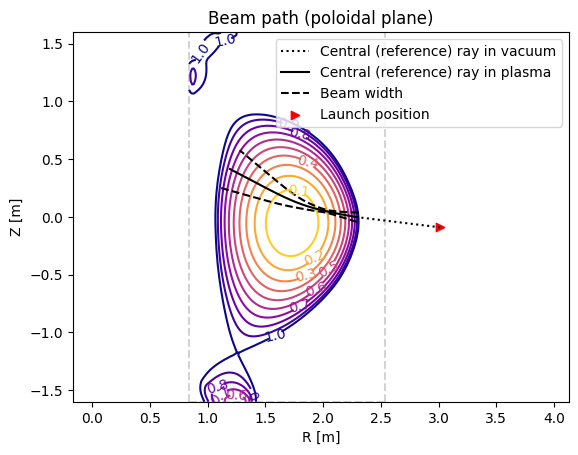

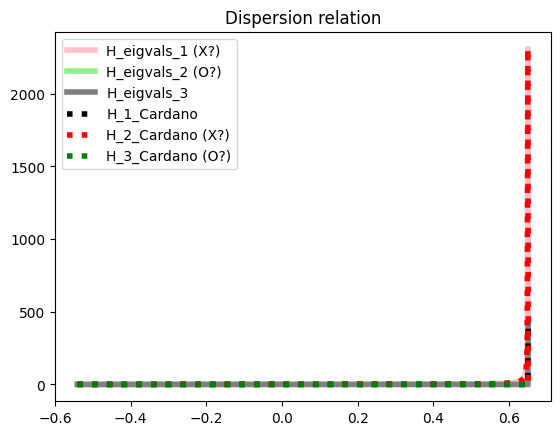

In [5]:
# both together

from scotty.benchmarking_3D import benchmark_me_up_3D
import numpy as np

# get_launch_stuff contains:
#     "poloidal_launch_angle_Torbeam": poloidal_launch_angle_Torbeam,
#     "toroidal_launch_angle_Torbeam": toroidal_launch_angle_Torbeam,
#     "launch_freq_GHz": launch_freq_GHz,
#     "launch_beam_width": launch_beam_width,
#     "launch_beam_curvature": launch_beam_curvature,
#     "launch_position": launch_position_cylindrical,
#     "mode_flag_cyl": -1 if mode_flag in [-1, "O"] else 1,
#     "mode_flag_cart": mode_flag,
#     "vacuumLaunch_flag": True,
#     "vacuumpropagation_flag": True,
#     "Psi_BC_flag": Psi_BC_flag,
#     "poloidal_flux_enter": poloidal_flux_enter,
#     "poloidal_flux_zero_density": poloidal_flux_zero_density,

# cyl scotty

kwargs_dict_cyl = get_launch_stuff(
    DBS_system = "DIII-D",
    mode_to_try = "O",
    launch_setting = 1)

kwargs_dict_cart = kwargs_dict_cyl.copy()

kwargs_dict_cyl["mode_flag"] = kwargs_dict_cyl.pop("mode_flag_cyl")
kwargs_dict_cyl.pop("mode_flag_cart")

kwargs_dict_cyl["delta_R"] = -1e-3
kwargs_dict_cyl["delta_Z"] = 1e-3
kwargs_dict_cyl["delta_K_R"]    = -1e-1
kwargs_dict_cyl["delta_K_zeta"] = 1e-1
kwargs_dict_cyl["delta_K_Z"]    = 1e-1
kwargs_dict_cyl["interp_smoothing"] = 0
kwargs_dict_cyl["interp_order"] = 5
kwargs_dict_cyl["len_tau"] = 1002
kwargs_dict_cyl["rtol"] = 1e-4
kwargs_dict_cyl["atol"] = 1e-7

kwargs_dict_cyl["find_B_method"] = "omfit"



# cart scotty

kwargs_dict_cart["mode_flag"] = kwargs_dict_cart.pop("mode_flag_cart")
kwargs_dict_cart.pop("mode_flag_cyl")

kwargs_dict_cart["launch_position_cartesian"] = kwargs_dict_cart.pop("launch_position")
# kwargs_dict_cart.pop("launch_position")

kwargs_dict_cart["auto_delta_sign"] = True
kwargs_dict_cart["delta_X"] = -1e-3
kwargs_dict_cart["delta_Y"] = 1e-3
kwargs_dict_cart["delta_Z"] = 1e-3
kwargs_dict_cart["delta_K_X"] = -1e-1
kwargs_dict_cart["delta_K_Y"] = 1e-1
kwargs_dict_cart["delta_K_Z"] = 1e-1
kwargs_dict_cart["interp_smoothing"] = 0
kwargs_dict_cart["interp_order"] = 5
kwargs_dict_cart["len_tau"] = 1002
kwargs_dict_cart["rtol"] = 1e-4
kwargs_dict_cart["atol"] = 1e-7



kwargs_dict_cart["further_analysis_flag"] = True
kwargs_dict_cart["figure_flag"] = True
kwargs_dict_cart["return_dt_field"] = True
kwargs_dict_cart["console_log_level"] = "debug"
kwargs_dict_cart["file_log_level"] = "debug"

kwargs_dict_cart["create_magnetic_geometry_3D"] = {
    "pad": 35,
    "Y_spacing": 0.02,
    # THIS IS ONLY FOR MAST-U
    # "X": np.linspace(0.06, 2.0, 65),
    # "Y": np.linspace(-0.5, 0.5, 51),
    # "Z": np.linspace(-2.2, 2.2, 65),
}



# FOR BEST
# kwargs_dict_cyl["ne_data_path"]       = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty"
# kwargs_dict_cyl["magnetic_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty"
# kwargs_dict_cyl["input_filename_suffix"] = "_BEST"
# kwargs_dict_cyl["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\tgt\cyl"
# kwargs_dict_cart["ne_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty"
# kwargs_dict_cart["magnetic_data_path"] = r""
# kwargs_dict_cart["input_filename_suffix"] = "_BEST"
# kwargs_dict_cart["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\tgt\cart"

# FOR DIII-D
kwargs_dict_cyl["ne_data_path"]       = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
kwargs_dict_cyl["magnetic_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
kwargs_dict_cyl["input_filename_suffix"] = "_189998_3000ms_quinn"
kwargs_dict_cyl["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\tgt\cyl"
kwargs_dict_cart["ne_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty"
kwargs_dict_cart["magnetic_data_path"] = r""
kwargs_dict_cart["input_filename_suffix"] = "_189998_3000ms_quinn"
kwargs_dict_cart["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\tgt\cart"

# FOR MAST-U
# kwargs_dict_cyl["ne_data_path"]       = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty"
# kwargs_dict_cyl["magnetic_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty"
# kwargs_dict_cyl["input_filename_suffix"] = "_51353_410ms_1.0"
# kwargs_dict_cyl["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\tgt\cyl"
# kwargs_dict_cart["ne_data_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty"
# kwargs_dict_cart["magnetic_data_path"] = r""
# kwargs_dict_cart["input_filename_suffix"] = "_51353_410ms_1.0"
# kwargs_dict_cart["output_path"] = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\tgt\cart"





# benchmarking
cyl, cart = benchmark_me_up_3D(kwargs_dict_cyl, kwargs_dict_cart)

(dt_cyl_scotty,
 field_cyl_scotty,
 ne_cyl_scotty,
 temeprature_cyl_scotty,
 H_cyl_scotty) = cyl

(dt_cart_scotty,
 field_cart_scotty,
 ne_cart_scotty,
 temeprature_cart_scotty,
 H_cart_scotty) = cart

In [6]:
print(field_cart_scotty.X_coord)
print()
print(field_cart_scotty.Y_coord)
print()
print(field_cart_scotty.Z_coord)

[0.85328125 0.8665625  0.87984375 0.893125   0.90640625 0.9196875
 0.93296875 0.94625    0.95953125 0.9728125  0.98609375 0.999375
 1.01265625 1.0259375  1.03921875 1.0525     1.06578125 1.0790625
 1.09234375 1.105625   1.11890625 1.1321875  1.14546875 1.15875
 1.17203125 1.1853125  1.19859375 1.211875   1.22515625 1.2384375
 1.25171875 1.265      1.27828125 1.2915625  1.30484375 1.318125
 1.33140625 1.3446875  1.35796875 1.37125    1.38453125 1.3978125
 1.41109375 1.424375   1.43765625 1.4509375  1.46421875 1.4775
 1.49078125 1.5040625  1.51734375 1.530625   1.54390625 1.5571875
 1.57046875 1.58375    1.59703125 1.6103125  1.62359375 1.636875
 1.65015625 1.6634375  1.67671875 1.69       1.70328125 1.7165625
 1.72984375 1.743125   1.75640625 1.7696875  1.78296875 1.79625
 1.80953125 1.8228125  1.83609375 1.849375   1.86265625 1.8759375
 1.88921875 1.9025     1.91578125 1.9290625  1.94234375 1.955625
 1.96890625 1.9821875  1.99546875 2.00875    2.02203125 2.0353125
 2.04859375 2.061875 

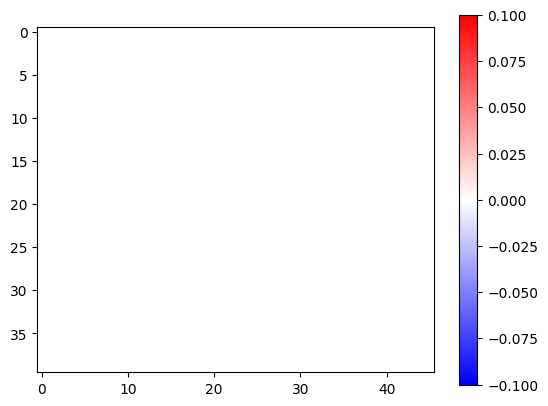

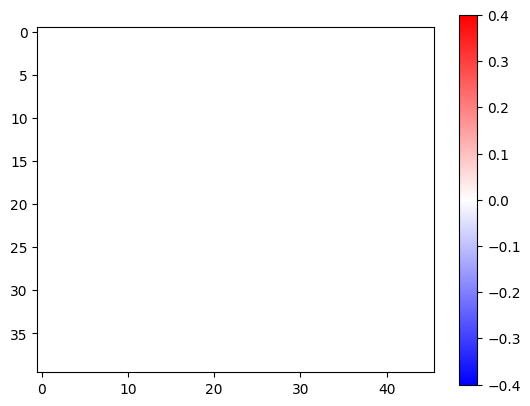

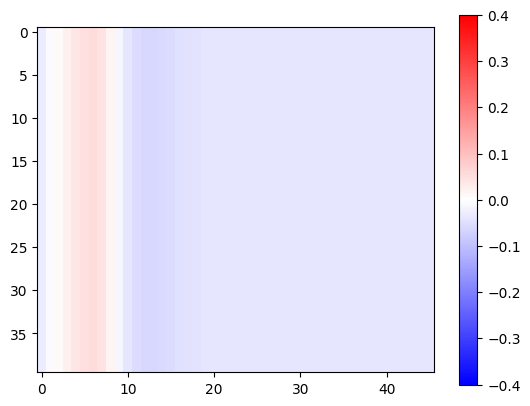

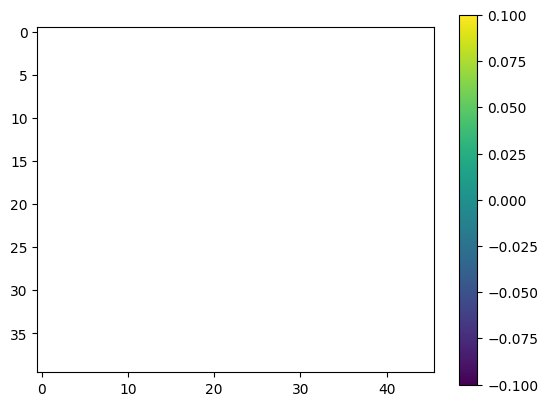

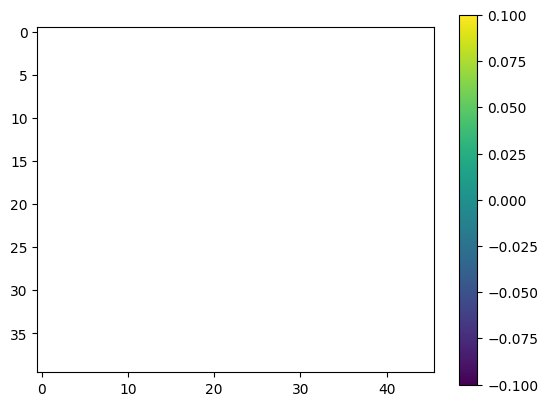

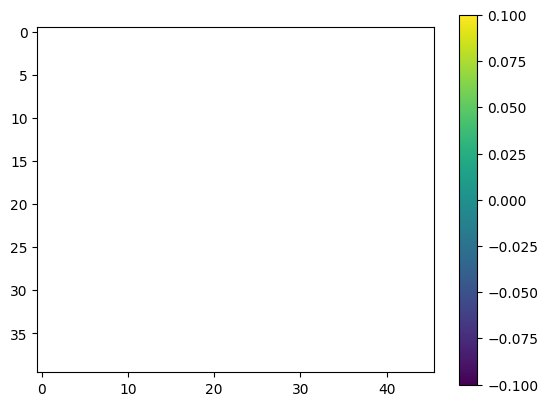

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def check_field_diff():
    X = np.linspace(3.5, 4.475, 40)
    Z = np.linspace(0.703125, 2.8125, 46)
    XX, ZZ = np.meshgrid(X, Z, indexing="ij")

    cart_B_X = field_cart_scotty.B_X(XX, 0, ZZ)
    cart_B_Y = field_cart_scotty.B_Y(XX, 0 ,ZZ)
    cart_B_Z = field_cart_scotty.B_Z(XX, 0, ZZ)
    cart_polflux = field_cart_scotty.polflux(XX, 0, ZZ)

    cyl_B_R = field_cyl_scotty.B_R(XX, ZZ)
    cyl_B_T = field_cyl_scotty.B_T(XX, ZZ)
    cyl_B_Z = field_cyl_scotty.B_Z(XX, ZZ)
    cyl_polflux = field_cyl_scotty.poloidal_flux(XX, ZZ)

    d_B_X = cart_B_X - cyl_B_R
    d_B_Y = cart_B_Y - cyl_B_T
    d_B_Z = cart_B_Z - cyl_B_Z
    d_pf  = cart_polflux - cyl_polflux

    plt.imshow(d_B_X, cmap='bwr')
    plt.colorbar()
    plt.show()

    ###

    plt.imshow(cart_B_X, vmin=-0.4, vmax=0.4, cmap='bwr')#, levels=np.linspace(-0.4, 0.4, 21))
    plt.colorbar()
    plt.show()

    plt.imshow(cyl_B_R, vmin=-0.4, vmax=0.4, cmap='bwr')#, levels=np.linspace(-0.4, 0.4, 21))
    plt.colorbar()
    plt.show()

    ###

    plt.imshow(d_B_Y)
    plt.colorbar()
    plt.show()

    plt.imshow(d_B_Z)
    plt.colorbar()
    plt.show()

    plt.imshow(d_pf)
    plt.colorbar()
    plt.show()

check_field_diff()

# def plot_field():
    

[-7.37020255e-02+0.00000000e+00j -1.11022302e-16+9.95481398e-01j
 -5.98731767e-02-3.46944695e-17j]
-0.039470003100492625

[-0.03292993+0.00000000e+00j  0.        -6.24329513e-02j
 -0.99750576+8.32667268e-17j]
1.4091417687252926e-05

[-0.99673649+0.00000000e+00j  0.        -7.15465753e-02j
  0.03738257+1.89735380e-19j]
0.8799065589148622

0.9978324435945655

H -1.4091566871821115e-05

H other 0.03968186820928943


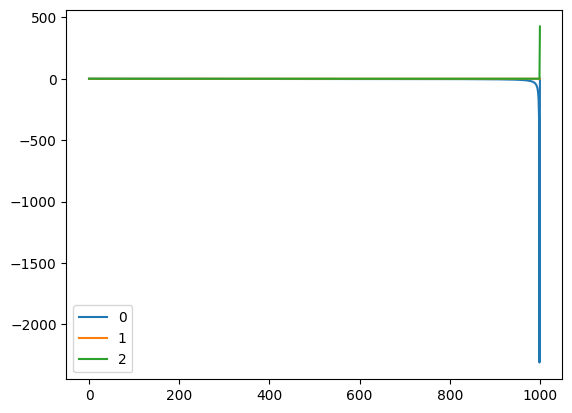

In [8]:
def print_stuff(i):
    print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, :, 0]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, 0, :]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_hat"][i, :]))
    print(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][i, 0]))
    print()
    print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, :, 1]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, 1, :]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_hat"][i, :]))
    print(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][i, 1]))
    print()
    print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, :, 2]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_eigvecs"][i, 2, :]))
    # print(np.array(dt_cyl_scotty["analysis"]["e_hat"][i, :]))
    print(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][i, 2]))
    print()
    print(np.array(dt_cyl_scotty["analysis"]["loc_p"][i]))
    print()
    print("H", np.array(dt_cyl_scotty["analysis"]["H_Booker"][i]))
    print()
    print("H other", np.array(dt_cyl_scotty["analysis"]["H_Booker_other"][i]))


print_stuff(0)

import matplotlib.pyplot as plt
plt.plot(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][:, 0]), label="0")
plt.plot(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][:, 1]), label="1")
plt.plot(np.array(dt_cyl_scotty["analysis"]["H_eigvals"][:, 2]), label="2")
plt.legend()

In [9]:
# Printing cylindrical Scotty deets 

from scotty.fun_general import cylindrical_to_cartesian, find_K_lab_Cartesian, find_Psi_3D_lab_Cartesian

# print(dt_cyl_scotty.keys())
# print()
# print("q_launch (cyl) ", np.array(dt_cyl_scotty["inputs"]["launch_position"]))
# print("q_initial (cyl)", np.array(dt_cyl_scotty["inputs"]["initial_position"]))
# print()
# print("K_launch (cyl) ", np.array(dt_cyl_scotty["inputs"]["launch_K"]))
# print("K_initial (cyl)", np.array(dt_cyl_scotty["inputs"]["K_initial"]))
# print()
# print("Psi_launch (cyl)")
# print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_launch"]))
# print()
# print("Psi_initial (cyl)")
# print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]))
# print()

# print("CONVERTING TO CARTESIAN...")

# print()
print("q_launch (cart) ", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[2])))
print("q_initial (cart)", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[2])))
print()
print("K_launch (cart) ", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_K"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"]))))
print("K_initial (cart)", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["K_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"]))))
print()
print("Psi_launch (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_launch"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[1])))
print()
print("Psi_entry (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_entry"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))
print()
print("Psi_initial (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))

q_launch (cart)  [ 3.01346  0.      -0.09017]
q_initial (cart) [ 2.30003906e+00  8.73688673e-17 -2.57292287e-03]

K_launch (cart)  [-1508.16161046    -0.           185.17896111]
K_initial (cart) [-1.43685215e+03  2.70874813e-15  1.89625067e+02]

Psi_launch (cart)
[[  -21.43925648  +1.85625607j     0.          +0.j
   -174.60873195 +15.11799251j]
 [    0.          +0.j         -1443.51325887+124.98242435j
      0.          +0.j        ]
 [ -174.60873195 +15.11799251j     0.          +0.j
  -1422.07400239+123.12616827j]]

Psi_entry (cart)
[[-6.42731354e+01+1.78338611e+01j -1.17769658e-15-3.35265885e-30j
  -5.23462681e+02+1.45245143e+02j]
 [-1.17769658e-15-3.80299077e-31j -4.29653096e+03+1.20076062e+03j
   0.00000000e+00+0.00000000e+00j]
 [-5.23462681e+02+1.45245143e+02j  0.00000000e+00+0.00000000e+00j
  -4.26326141e+03+1.18292676e+03j]]

Psi_initial (cart)
[[-1.40196028e+04+2.04536805e+01j  1.19309179e+01-3.90165197e+00j
  -1.39751094e+03+1.55584708e+02j]
 [ 1.19309179e+01-3.90165197e+00

In [10]:
# Checking initial Psi_3D_labframe_cartesian from cyl Scotty and cart Scotty

Psi_from_cyl_scotty = np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"])

Psi_from_cart_scotty = np.array(dt_cart_scotty["solver_output"]["initial_Psi_3D_lab_cartesian"])

print(Psi_from_cyl_scotty)
print()
print(Psi_from_cart_scotty)
print()
print(Psi_from_cyl_scotty - Psi_from_cart_scotty)

[[-1.40196028e+04+2.04536805e+01j  2.74415771e+01-8.97395193e+00j
  -1.39751094e+03+1.55584708e+02j]
 [ 2.74415771e+01-8.97395193e+00j -1.94246047e+04+6.35223944e+03j
   1.71096761e+00-5.59521086e-01j]
 [-1.39751094e+03+1.55584708e+02j  1.71096761e+00-5.59521086e-01j
  -4.21745606e+03+1.18420591e+03j]]

[[-1.38995818e+04+2.04529523e+01j  1.19297128e+01-3.90153069e+00j
  -1.39727116e+03+1.55582127e+02j]
 [ 1.19297128e+01-3.90153069e+00j -4.29631631e+03+1.20076430e+03j
   7.43583970e-01-2.43184034e-01j]
 [-1.39727116e+03+1.55582127e+02j  7.43583970e-01-2.43184034e-01j
  -4.21804960e+03+1.18420877e+03j]]

[[-1.20021018e+02+7.28196944e-04j  1.55118644e+01-5.07242124e+00j
  -2.39787288e-01+2.58071782e-03j]
 [ 1.55118644e+01-5.07242124e+00j -1.51282884e+04+5.15147514e+03j
   9.67383635e-01-3.16337052e-01j]
 [-2.39787288e-01+2.58071782e-03j  9.67383635e-01-3.16337052e-01j
   5.93548619e-01-2.85791359e-03j]]


In [11]:
# (Cart Scotty only) Checking poloidal flux and its derivatives

import numpy as np

test_X = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[0]
test_Y = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[1]
test_Z = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[2]
test_R = np.sqrt(test_X**2 + test_Y**2)
# print(field_cart_scotty.B_X(test_X, test_Y, test_Z), field_cart_scotty.B_Y(test_X, test_Y, test_Z), field_cart_scotty.B_Z(test_X, test_Y, test_Z))
print("derivatives by cart Scotty, at entry point XYZ")
print(test_X, test_Y, test_Z)
print()
print("polflux, cart", field_cart_scotty.polflux(test_X, test_Y, test_Z))
print("dp/dX, cart", field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3))
print("dp/dY, cart", field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3))
print("dp/dZ, cart", field_cart_scotty.d_polflux_dZ(test_X, test_Y, test_Z, 1e-3))
print()
print("converting cart dervs to cyl dervs for comparison")
print("dp/dR, cart", field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3)*(test_X/test_R) + field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3)*(test_Y/test_R))
print("dp/dzeta, cart", field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3)*(test_X) - field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3)*(test_Y))

derivatives by cart Scotty, at entry point XYZ
2.3000385245496715 8.736893263532266e-17 -0.002572857398129097

polflux, cart 0.9499999999999141
dp/dX, cart 7.2240858084804405
dp/dY, cart 2.220446049250313e-13
dp/dZ, cart 0.45028028030802414

converting cart dervs to cyl dervs for comparison
dp/dR, cart 7.2240858084804405
dp/dzeta, cart 5.100799848296307e-13


In [12]:
# (Cyl Scotty only) Checking poloidal flux and its derivatives

import numpy as np

print("derivatives by cyl Scotty, at entry point XYZ")
print(test_X, test_Y, test_Z)
print()
print("polflux, cyl", field_cyl_scotty.poloidal_flux(test_R, test_Z))
print("dp/dR, cyl", field_cyl_scotty.d_poloidal_flux_dR(test_R, test_Z, 1e-3))
print("dp/dzeta, cyl", 0)
print("dp/dZ, cyl", field_cyl_scotty.d_poloidal_flux_dZ(test_R, test_Z, 1e-3))
print(".")
print(".")
print(".")

derivatives by cyl Scotty, at entry point XYZ
2.3000385245496715 8.736893263532266e-17 -0.002572857398129097

polflux, cyl 0.9499961779035143
dp/dR, cyl 7.223573998070172
dp/dzeta, cyl 0
dp/dZ, cyl 0.4503900015841247
.
.
.


In [13]:
# (Cart Scotty only) Checking Psi_w entries

import numpy as np

# test_index = np.random.randint(0, 1002)

# print("THIS ('entry') IS INCONSISTENT BECAUSE OF INCORRECT IMPLEMENTATION IN CYL SCOTTY")
# print()
# print("Psi_xx_entry, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xx_entry"]))
# print("Psi_xx_entry, cart", np.array(dt_cart_scotty["analysis"]["Psi_xx_entry"]))
# print()
# print("Psi_xy_entry, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xy_entry"]))
# print("Psi_xy_entry, cart", np.array(dt_cart_scotty["analysis"]["Psi_xy_entry"]))
# print()
# print("Psi_yy_entry, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_yy_entry"]))
# print("Psi_yy_entry, cart", np.array(dt_cart_scotty["analysis"]["Psi_yy_entry"]))
# print()
# print()
# print()

for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    # test_index = 1
    print("tau index", test_index)
    print(f"Psi_xx, cart", np.array(dt_cart_scotty["analysis"]["Psi_xx_beamframe_cartesian"][test_index]))
    print(f"Psi_xy, cart", np.array(dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]))
    print(f"Psi_yy, cart", np.array(dt_cart_scotty["analysis"]["Psi_yy_beamframe_cartesian"][test_index]))
    print()

tau index 0
Psi_xx, cart (-4307.010565260575+1200.636736954417j)
Psi_xy, cart (68.58848543238719+0.02091277736161601j)
Psi_yy, cart (-4732.714817796634+1204.7892835936677j)

tau index 1
Psi_xx, cart (-4314.256168897109+1211.3519266084597j)
Psi_xy, cart (65.58832166617935+0.01765274155658858j)
Psi_yy, cart (-4746.436880179558+1217.8461478121835j)

tau index 5
Psi_xx, cart (-4341.2418025080515+1252.7752438715117j)
Psi_xy, cart (61.89083069689423-1.7230092197451086e-05j)
Psi_yy, cart (-4869.802751025993+1272.000291975362j)



In [14]:
# (Cyl Scotty only) Checking Psi_w entries

import numpy as np

for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    # test_index = 1
    print("tau index", test_index)
    print(f"Psi_xx, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xx"][test_index]))
    print(f"Psi_xy, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xy"][test_index]))
    print(f"Psi_yy, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_yy"][test_index]))
    print()

tau index 0
Psi_xx, cyl  (-4307.250175776288+1200.633075334466j)
Psi_xy, cyl  (68.77074623161661+0.02074353690190378j)
Psi_yy, cyl  (-4734.218877429342+1204.7871412962588j)

tau index 1
Psi_xx, cyl  (-4313.4269104288405+1211.3795468404257j)
Psi_xy, cyl  (57.85181628006114+0.0245250957171379j)
Psi_yy, cyl  (-4696.454351932025+1217.7987174874104j)

tau index 5
Psi_xx, cyl  (-4342.6125257330295+1252.9295338097447j)
Psi_xy, cyl  (59.194876652905805+0.017495177785235683j)
Psi_yy, cyl  (-4852.193576658412+1272.0236471851633j)



In [15]:
# (Cart Scotty only) Checking x_hat, y_hat, g_hat

import numpy as np

for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    print("tau index", test_index)
    print(f"x_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["x_hat_cartesian"][test_index]))
    print(f"y_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["y_hat_cartesian"][test_index]))
    print(f"g_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["g_hat_cartesian"][test_index]))
    print()

tau index 0


KeyError: 'Could not find node at x_hat_cartesian'

In [ ]:
# (Cyl Scotty only) Checking x_hat, y_hat, g_hat

import numpy as np

for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    print("tau index", test_index)
    print(f"x_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["x_hat_Cartesian"][test_index]))
    print(f"y_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["y_hat_Cartesian"][test_index]))
    print(f"g_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["g_hat_Cartesian"][test_index]))
    print()

In [ ]:
# Checking to see the difference between initial and entry Psi

print("initial Psi_3D_labframe, cart")
print(np.array(dt_cart_scotty["solver_output"]["initial_Psi_3D_lab_cartesian"]))
print()
print("initial Psi_3D_labframe, cyl")
print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]))
print()
print("entry Psi_3D_labframe, cyl")
print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_entry"]))

### Benchmarking copy paste

In [ ]:
# Checking all (Cart Scotty only)

import numpy as np

test_X = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[0]
test_Y = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[1]
test_Z = np.array(dt_cart_scotty["solver_output"]["initial_position_cartesian"])[2]
test_R = np.sqrt(test_X**2 + test_Y**2)
# print(field_cart_scotty.B_X(test_X, test_Y, test_Z), field_cart_scotty.B_Y(test_X, test_Y, test_Z), field_cart_scotty.B_Z(test_X, test_Y, test_Z))
# print("derivatives by cart Scotty, at entry point XYZ")
# print(test_X, test_Y, test_Z)
# print()
# print("polflux, cart", field_cart_scotty.polflux(test_X, test_Y, test_Z))
# print("dp/dX, cart", field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3))
# print("dp/dY, cart", field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3))
# print("dp/dZ, cart", field_cart_scotty.d_polflux_dZ(test_X, test_Y, test_Z, 1e-3))
# print()
# print("converting cart dervs to cyl dervs for comparison")
# print("dp/dR, cart", field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3)*(test_X/test_R) + field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3)*(test_Y/test_R))
# print("dp/dzeta, cart", field_cart_scotty.d_polflux_dY(test_X, test_Y, test_Z, 1e-3)*(test_X) - field_cart_scotty.d_polflux_dX(test_X, test_Y, test_Z, 1e-3)*(test_Y))
# print()

print("launch parameters")
print()
print("q_launch_cartesian", dt_cart_scotty["inputs"]["launch_position_cartesian"])
print("q_initial_cartesian", dt_cart_scotty["solver_output"]["initial_position_cartesian"])
print()
print("K_launch_cartesian", dt_cart_scotty["solver_output"]["K_launch_cartesian"])
print("K_initial_cartesian", dt_cart_scotty["solver_output"]["initial_K_cartesian"])
print()
print("Psi_3D_launch_labframe_cartesian")
print(np.array(dt_cart_scotty["solver_output"]["Psi_3D_launch_labframe_cartesian"]))
print()
print("Psi_3D_entry_labframe_cartesian")
print(np.array(dt_cart_scotty["solver_output"]["Psi_3D_entry_labframe_cartesian"]))
print()
print("Psi_3D_initial_labframe_cartesian")
print(np.array(dt_cart_scotty["solver_output"]["initial_Psi_3D_lab_cartesian"]))
print()

print("Psi_w entries")
print()
for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    # test_index = 1
    print("tau index", test_index)
    print(f"Psi_xx, cart", np.array(dt_cart_scotty["analysis"]["Psi_xx_beamframe_cartesian"][test_index]))
    print(f"Psi_xy, cart", np.array(dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]))
    print(f"Psi_yy, cart", np.array(dt_cart_scotty["analysis"]["Psi_yy_beamframe_cartesian"][test_index]))
    print()
    print(f"Psi_xg, cart", np.array(dt_cart_scotty["analysis"]["Psi_xg_beamframe_cartesian"][test_index]))
    print(f"Psi_yg, cart", np.array(dt_cart_scotty["analysis"]["Psi_yg_beamframe_cartesian"][test_index]))
    print(f"Psi_gg, cart", np.array(dt_cart_scotty["analysis"]["Psi_gg_beamframe_cartesian"][test_index]))
    print()

print()
print()
print()

print("x_hat, y_hat, g_hat")
print()
for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    print("tau index", test_index)
    print(f"x_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["x_hat_cartesian"][test_index]))
    print(f"y_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["y_hat_cartesian"][test_index]))
    print(f"g_hat_Cartesian, cart", np.array(dt_cart_scotty["analysis"]["g_hat_cartesian"][test_index]))
    print()

for test_index in [0]:
    Psi_w_cart_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cart_scotty[0, 0] = dt_cart_scotty["analysis"]["Psi_xx_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 0] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[0, 1] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 1] = dt_cart_scotty["analysis"]["Psi_yy_beamframe_cartesian"][test_index]

    Re_Psi_w_cart_scotty = np.real(Psi_w_cart_scotty) 
    g_hat_initial = np.array(dt_cart_scotty["analysis"]["g_hat"][test_index])
    K_initial_cartesian = np.array(dt_cart_scotty["solver_output"]["initial_K_cartesian"])
    K_initial_cartesian_magnitude = np.sqrt( np.dot(K_initial_cartesian, K_initial_cartesian) )
    K_g_initial_magnitude = np.dot(K_initial_cartesian, g_hat_initial)
    curv1_cart_scotty, curv2_cart_scotty = K_g_initial_magnitude**2 / K_initial_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cart_scotty)

    Im_Psi_w_cart_scotty = np.imag(Psi_w_cart_scotty)
    width1_cart_scotty, width2_cart_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cart_scotty))
    print("widths (for tau index 0)")
    print(width1_cart_scotty)
    print(width2_cart_scotty)
    print("curvatures (not radius) (for tau index 0)")
    print(curv1_cart_scotty)
    print(curv2_cart_scotty)

In [ ]:
# Checking all (Cyl Scotty only)

import numpy as np
from scotty.fun_general import cylindrical_to_cartesian, find_K_lab_Cartesian, find_Psi_3D_lab_Cartesian, find_Psi_3D_lab

# print(".")
# print(".")
# print(".")
# print(".")
# print(".")
# print(".")
# print(".")
# print(".")
# print(".")
print("launch parameters")
print()
print("q_launch (cart) ", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[2])))
print("q_initial (cart)", np.array(cylindrical_to_cartesian(
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[2])))
print()
print("K_launch (cart) ", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["launch_K"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"]))))
print("K_initial (cart)", np.array(find_K_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["K_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"]))))
print()
print("Psi_launch (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_launch"]),
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[0],
    np.array(dt_cyl_scotty["inputs"]["launch_K"])[1])))
print()
print("Psi_entry (cart)")
print(np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_entry_cartesian"]))
# print(np.array(find_Psi_3D_lab_Cartesian(
#     np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_entry"]),
#     np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
#     np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
#     np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
#     np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))
print()
print("Psi_initial (cart)")
print(np.array(find_Psi_3D_lab_Cartesian(
    np.array(dt_cyl_scotty["inputs"]["Psi_3D_lab_initial"]),
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[0],
    np.array(dt_cyl_scotty["inputs"]["initial_position"])[1],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[0],
    np.array(dt_cyl_scotty["inputs"]["K_initial"])[1])))

print()
print()
print()

print("derivatives by cyl Scotty, at entry point XYZ")
print(test_X, test_Y, test_Z)
print()
print("polflux, cyl", field_cyl_scotty.poloidal_flux(test_R, test_Z))
print("dp/dR, cyl", field_cyl_scotty.d_poloidal_flux_dR(test_R, test_Z, 1e-3))
print("dp/dzeta, cyl", 0)
print("dp/dZ, cyl", field_cyl_scotty.d_poloidal_flux_dZ(test_R, test_Z, 1e-3))
print(".")
print(".")
print(".")

print()
print()
print()
print()

print("Psi_w entries")
print()
for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    # test_index = 1
    print("tau index", test_index)
    print(f"Psi_xx, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xx"][test_index]))
    print(f"Psi_xy, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xy"][test_index]))
    print(f"Psi_yy, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_yy"][test_index]))
    print()
    print(f"Psi_xg, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_xg"][test_index]))
    print(f"Psi_yg, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_yg"][test_index]))
    print(f"Psi_gg, cyl ", np.array(dt_cyl_scotty["analysis"]["Psi_gg"][test_index]))
    print()

print()
print()
print()

print("x_hat, y_hat, g_hat")
print()
for test_index in [0,1,5]: # [0,1,2,3,4,5]:
    print("tau index", test_index)
    print(f"x_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["x_hat_Cartesian"][test_index]))
    print(f"y_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["y_hat_Cartesian"][test_index]))
    print(f"g_hat_Cartesian, cyl ", np.array(dt_cyl_scotty["analysis"]["g_hat_Cartesian"][test_index]))
    print()

for test_index in [0]:
    Psi_w_cyl_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cyl_scotty[0, 0] = dt_cyl_scotty["analysis"]["Psi_xx"][test_index]
    Psi_w_cyl_scotty[1, 0] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[0, 1] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[1, 1] = dt_cyl_scotty["analysis"]["Psi_yy"][test_index]

    Re_Psi_w_cyl_scotty = np.real(Psi_w_cyl_scotty) 
    g_hat_initial = np.array(dt_cyl_scotty["analysis"]["g_hat_Cartesian"][test_index])
    K_initial_cartesian = np.array(find_K_lab_Cartesian(
                            np.array(dt_cyl_scotty["inputs"]["K_initial"]),
                            np.array(dt_cyl_scotty["inputs"]["initial_position"])))
    K_initial_cartesian_magnitude = np.sqrt( np.dot(K_initial_cartesian, K_initial_cartesian) )
    K_g_initial_magnitude = np.dot(K_initial_cartesian, g_hat_initial)
    curv1_cyl_scotty, curv2_cyl_scotty = K_g_initial_magnitude**2 / K_initial_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cyl_scotty)

    Im_Psi_w_cyl_scotty = np.imag(Psi_w_cyl_scotty)
    width1_cyl_scotty, width2_cyl_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cyl_scotty))
    print("widths (for tau index 0)")
    print(width1_cyl_scotty)
    print(width2_cyl_scotty)
    print("curvatures (not radius) (for tau index 0)")
    print(curv1_cyl_scotty)
    print(curv2_cyl_scotty)

In [ ]:
# Checking curvatures and widths (Cart Scotty only)

import numpy as np

for test_index in [0]:
    Psi_w_cart_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cart_scotty[0, 0] = dt_cart_scotty["analysis"]["Psi_xx_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 0] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[0, 1] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 1] = dt_cart_scotty["analysis"]["Psi_yy_beamframe_cartesian"][test_index]

    Re_Psi_w_cart_scotty = np.real(Psi_w_cart_scotty) 
    g_hat_initial = np.array(dt_cart_scotty["analysis"]["g_hat"][test_index])
    K_initial_cartesian = np.array(dt_cart_scotty["solver_output"]["initial_K_cartesian"])
    K_initial_cartesian_magnitude = np.sqrt( np.dot(K_initial_cartesian, K_initial_cartesian) )
    K_g_initial_magnitude = np.dot(K_initial_cartesian, g_hat_initial)
    curv1_cart_scotty, curv2_cart_scotty = K_g_initial_magnitude**2 / K_initial_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cart_scotty)

    Im_Psi_w_cart_scotty = np.imag(Psi_w_cart_scotty)
    width1_cart_scotty, width2_cart_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cart_scotty))
    print(f"widths (for tau index {test_index})")
    print(width1_cart_scotty)
    print(width2_cart_scotty)
    print()
    print(f"curvatures (not radius) (for tau index {test_index})")
    print(curv1_cart_scotty)
    print(curv2_cart_scotty)
    print()
    print()
    print()

In [ ]:
# Checking curvatures and widths (Cyl Scotty only)

import numpy as np

for test_index in [0]:
    Psi_w_cyl_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cyl_scotty[0, 0] = dt_cyl_scotty["analysis"]["Psi_xx"][test_index]
    Psi_w_cyl_scotty[1, 0] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[0, 1] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[1, 1] = dt_cyl_scotty["analysis"]["Psi_yy"][test_index]

    Re_Psi_w_cyl_scotty = np.real(Psi_w_cyl_scotty) 
    g_hat_initial = np.array(dt_cyl_scotty["analysis"]["g_hat_Cartesian"][test_index])
    K_initial_cartesian = np.array(find_K_lab_Cartesian(
                            np.array(dt_cyl_scotty["inputs"]["K_initial"]),
                            np.array(dt_cyl_scotty["inputs"]["initial_position"])))
    K_initial_cartesian_magnitude = np.sqrt( np.dot(K_initial_cartesian, K_initial_cartesian) )
    K_g_initial_magnitude = np.dot(K_initial_cartesian, g_hat_initial)
    curv1_cyl_scotty, curv2_cyl_scotty = K_g_initial_magnitude**2 / K_initial_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cyl_scotty)

    Im_Psi_w_cyl_scotty = np.imag(Psi_w_cyl_scotty)
    width1_cyl_scotty, width2_cyl_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cyl_scotty))
    print(f"widths (for tau index {test_index})")
    print(width1_cyl_scotty)
    print(width2_cyl_scotty)
    print()
    print(f"curvatures (not radius) (for tau index {test_index})")
    print(curv1_cyl_scotty)
    print(curv2_cyl_scotty)
    print()
    print()
    print()

In [ ]:
what_index_of_tau_to_check = 925

In [ ]:
# Checking curvatures and widths (Cart Scotty only)

import numpy as np

def benchmark_cart_scotty(test_index, print_statements = True):

    q_cartesian = np.array((
        dt_cart_scotty["solver_output"]["q_X"][test_index],
        dt_cart_scotty["solver_output"]["q_Y"][test_index],
        dt_cart_scotty["solver_output"]["q_Z"][test_index],
    ))

    K_cartesian = np.array((
        dt_cart_scotty["solver_output"]["K_X"][test_index],
        dt_cart_scotty["solver_output"]["K_Y"][test_index],
        dt_cart_scotty["solver_output"]["K_Z"][test_index],
    ))

    Psi_w_cart_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cart_scotty[0, 0] = dt_cart_scotty["analysis"]["Psi_xx_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 0] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[0, 1] = dt_cart_scotty["analysis"]["Psi_xy_beamframe_cartesian"][test_index]
    Psi_w_cart_scotty[1, 1] = dt_cart_scotty["analysis"]["Psi_yy_beamframe_cartesian"][test_index]

    Re_Psi_w_cart_scotty = np.real(Psi_w_cart_scotty) 
    g_hat = np.array(dt_cart_scotty["analysis"]["g_hat"][test_index])
    K_cartesian_magnitude = np.sqrt( np.dot(K_cartesian, K_cartesian) )
    K_g_magnitude = np.dot(g_hat, K_cartesian)
    curv1_cart_scotty, curv2_cart_scotty = K_g_magnitude**2 / K_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cart_scotty)

    Im_Psi_w_cart_scotty = np.imag(Psi_w_cart_scotty)
    width1_cart_scotty, width2_cart_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cart_scotty))

    arc_length = float(dt_cart_scotty["analysis"]["arc_length"][test_index])

    arc_length_relative_to_cutoff = float(dt_cart_scotty["analysis"]["arc_length_relative_to_cutoff"][test_index])

    if print_statements:
        print(f"Cart. Scotty stuff for tau index = {test_index}")
        print()
        print("q_cartesian", q_cartesian)
        print()
        print("K_cartesian", K_cartesian)
        print()
        print("widths")
        print(width1_cart_scotty)
        print(width2_cart_scotty)
        print()
        print("curvatures (not radius)")
        print(curv1_cart_scotty)
        print(curv2_cart_scotty)
        print()

    return (arc_length,
            arc_length_relative_to_cutoff,
            q_cartesian[0],
            q_cartesian[1],
            q_cartesian[2],
            K_cartesian[0],
            K_cartesian[1],
            K_cartesian[2],
            width1_cart_scotty,
            width2_cart_scotty,
            curv1_cart_scotty,
            curv2_cart_scotty)

benchmark_cart_scotty(what_index_of_tau_to_check)

In [ ]:
# Checking curvatures and widths (Cyl Scotty only)

import numpy as np
from scotty.fun_general import cylindrical_to_cartesian, find_K_lab_Cartesian

def benchmark_cyl_scotty(test_index, print_statements = True):

    q_cylindrical = np.array((
        dt_cyl_scotty["solver_output"]["q_R"][test_index],
        dt_cyl_scotty["solver_output"]["q_zeta"][test_index],
        dt_cyl_scotty["solver_output"]["q_Z"][test_index],
    ))
    q_cartesian = np.array(cylindrical_to_cartesian(*q_cylindrical))

    K_cylindrical = np.array((
        dt_cyl_scotty["solver_output"]["K_R"][test_index],
        dt_cyl_scotty["inputs"]["launch_K"][1],
        dt_cyl_scotty["solver_output"]["K_Z"][test_index],
    ))
    K_cartesian = find_K_lab_Cartesian(K_cylindrical, q_cylindrical)

    Psi_w_cyl_scotty = np.zeros((2,2), dtype=np.complex128)
    Psi_w_cyl_scotty[0, 0] = dt_cyl_scotty["analysis"]["Psi_xx"][test_index]
    Psi_w_cyl_scotty[1, 0] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[0, 1] = dt_cyl_scotty["analysis"]["Psi_xy"][test_index]
    Psi_w_cyl_scotty[1, 1] = dt_cyl_scotty["analysis"]["Psi_yy"][test_index]

    Re_Psi_w_cyl_scotty = np.real(Psi_w_cyl_scotty) 
    g_hat = np.array(dt_cyl_scotty["analysis"]["g_hat_Cartesian"][test_index])
    K_cartesian_magnitude = np.sqrt( np.dot(K_cartesian, K_cartesian) )
    K_g_magnitude = np.dot(g_hat, K_cartesian)
    curv1_cyl_scotty, curv2_cyl_scotty = K_g_magnitude**2 / K_cartesian_magnitude**3 * np.linalg.eigvalsh(Re_Psi_w_cyl_scotty)

    Im_Psi_w_cyl_scotty = np.imag(Psi_w_cyl_scotty)
    width1_cyl_scotty, width2_cyl_scotty = np.sqrt(2 / np.linalg.eigvalsh(Im_Psi_w_cyl_scotty))

    arc_length = float(dt_cyl_scotty["analysis"]["arc_length"][test_index])
    
    arc_length_relative_to_cutoff = float(dt_cyl_scotty["analysis"]["arc_length_relative_to_cutoff"][test_index])

    if print_statements:
        print(f"Cyl. Scotty stuff for tau index = {test_index}")
        print()
        print("q_cartesian", q_cartesian)
        print()
        print("K_cartesian", K_cartesian)
        print()
        print("widths")
        print(width1_cyl_scotty)
        print(width2_cyl_scotty)
        print()
        print("curvatures (not radius)")
        print(curv1_cyl_scotty)
        print(curv2_cyl_scotty)
        print()

    return (arc_length,
            arc_length_relative_to_cutoff,
            q_cartesian[0],
            q_cartesian[1],
            q_cartesian[2],
            K_cartesian[0],
            K_cartesian[1],
            K_cartesian[2],
            width1_cyl_scotty,
            width2_cyl_scotty,
            curv1_cyl_scotty,
            curv2_cyl_scotty)

benchmark_cyl_scotty(what_index_of_tau_to_check)

In [ ]:
# Making comparison graphs for q, K, widths, curvs

import matplotlib.pyplot as plt
import math

def comparison_graphs(len_tau, print_statements = False, switch_widths = False, switch_curvs = False, adjustment_cart_scotty = 0, adjustment_cyl_scotty = 0):
    cart_scotty_vals = {
        "arc_length": np.zeros(len_tau),
        "arc_length_relative_to_cutoff": np.zeros(len_tau),
        "q_X": np.zeros(len_tau),
        "q_Y": np.zeros(len_tau),
        "q_Z": np.zeros(len_tau),
        "K_X": np.zeros(len_tau),
        "K_Y": np.zeros(len_tau),
        "K_Z": np.zeros(len_tau),
        "width1": np.zeros(len_tau),
        "width2": np.zeros(len_tau),
        "curv1": np.zeros(len_tau),
        "curv2": np.zeros(len_tau),
    }

    cyl_scotty_vals = {
        "arc_length": np.zeros(len_tau),
        "arc_length_relative_to_cutoff": np.zeros(len_tau),
        "q_X": np.zeros(len_tau),
        "q_Y": np.zeros(len_tau),
        "q_Z": np.zeros(len_tau),
        "K_X": np.zeros(len_tau),
        "K_Y": np.zeros(len_tau),
        "K_Z": np.zeros(len_tau),
        "width1": np.zeros(len_tau),
        "width2": np.zeros(len_tau),
        "curv1": np.zeros(len_tau),
        "curv2": np.zeros(len_tau),
    }

    for i in range(len_tau):
        (arc_length_cart_scotty,
         arc_length_relative_to_cutoff_cart_scotty,
         q_X_cart_scotty,
         q_Y_cart_scotty,
         q_Z_cart_scotty,
         K_X_cart_scotty,
         K_Y_cart_scotty,
         K_Z_cart_scotty,
         width1_cart_scotty,
         width2_cart_scotty,
         curv1_cart_scotty,
         curv2_cart_scotty) = benchmark_cart_scotty(i, print_statements)
        
        cart_scotty_vals["arc_length"][i] = arc_length_cart_scotty
        cart_scotty_vals["arc_length_relative_to_cutoff"][i] = arc_length_relative_to_cutoff_cart_scotty
        cart_scotty_vals["q_X"][i] = q_X_cart_scotty
        cart_scotty_vals["q_Y"][i] = q_Y_cart_scotty
        cart_scotty_vals["q_Z"][i] = q_Z_cart_scotty
        cart_scotty_vals["K_X"][i] = K_X_cart_scotty
        cart_scotty_vals["K_Y"][i] = K_Y_cart_scotty
        cart_scotty_vals["K_Z"][i] = K_Z_cart_scotty
        cart_scotty_vals["width1"][i] = width1_cart_scotty
        cart_scotty_vals["width2"][i] = width2_cart_scotty
        cart_scotty_vals["curv1"][i] = curv1_cart_scotty
        cart_scotty_vals["curv2"][i] = curv2_cart_scotty
        
        (arc_length_cyl_scotty,
         arc_length_relative_to_cutoff_cyl_scotty,
         q_X_cyl_scotty,
         q_Y_cyl_scotty,
         q_Z_cyl_scotty,
         K_X_cyl_scotty,
         K_Y_cyl_scotty,
         K_Z_cyl_scotty,
         width1_cyl_scotty,
         width2_cyl_scotty,
         curv1_cyl_scotty,
         curv2_cyl_scotty) = benchmark_cyl_scotty(i, print_statements)
        
        cyl_scotty_vals["arc_length"][i] = arc_length_cyl_scotty
        cyl_scotty_vals["arc_length_relative_to_cutoff"][i] = arc_length_relative_to_cutoff_cyl_scotty
        cyl_scotty_vals["q_X"][i] = q_X_cyl_scotty
        cyl_scotty_vals["q_Y"][i] = q_Y_cyl_scotty
        cyl_scotty_vals["q_Z"][i] = q_Z_cyl_scotty
        cyl_scotty_vals["K_X"][i] = K_X_cyl_scotty
        cyl_scotty_vals["K_Y"][i] = K_Y_cyl_scotty
        cyl_scotty_vals["K_Z"][i] = K_Z_cyl_scotty
        cyl_scotty_vals["width1"][i] = width1_cyl_scotty
        cyl_scotty_vals["width2"][i] = width2_cyl_scotty
        cyl_scotty_vals["curv1"][i] = curv1_cyl_scotty
        cyl_scotty_vals["curv2"][i] = curv2_cyl_scotty
    
    def switching_widths_curvs_jump(switch_widths, switch_curvs, adjustment_cart_scotty, adjustment_cyl_scotty):
        min_width1_index_cart_scotty = np.argmin(cart_scotty_vals["width1"])
        min_width2_index_cart_scotty = np.argmin(cart_scotty_vals["width2"])
        min_width1_index_cyl_scotty = np.argmin(cyl_scotty_vals["width1"])
        min_width2_index_cyl_scotty = np.argmin(cyl_scotty_vals["width2"])

        distance_from_cutoff___min_width1_cart_scotty = abs(cart_scotty_vals["arc_length_relative_to_cutoff"][min_width1_index_cart_scotty])
        distance_from_cutoff___min_width2_cart_scotty = abs(cart_scotty_vals["arc_length_relative_to_cutoff"][min_width2_index_cart_scotty])
        distance_from_cutoff___min_width1_cyl_scotty = abs(cyl_scotty_vals["arc_length_relative_to_cutoff"][min_width1_index_cyl_scotty])
        distance_from_cutoff___min_width2_cyl_scotty = abs(cyl_scotty_vals["arc_length_relative_to_cutoff"][min_width2_index_cyl_scotty])

        if distance_from_cutoff___min_width1_cart_scotty < distance_from_cutoff___min_width2_cart_scotty: switch_index_cart_scotty = min_width1_index_cart_scotty
        else: switch_index_cart_scotty = min_width2_index_cart_scotty

        if distance_from_cutoff___min_width1_cyl_scotty < distance_from_cutoff___min_width2_cyl_scotty: switch_index_cyl_scotty = min_width1_index_cyl_scotty
        else: switch_index_cyl_scotty = min_width2_index_cyl_scotty

        if switch_widths:
            new_width1_cart_scotty = np.concatenate((cart_scotty_vals["width1"][:switch_index_cart_scotty+adjustment_cart_scotty], cart_scotty_vals["width2"][switch_index_cart_scotty+adjustment_cart_scotty:])).flatten()
            new_width2_cart_scotty = np.concatenate((cart_scotty_vals["width2"][:switch_index_cart_scotty+adjustment_cart_scotty], cart_scotty_vals["width1"][switch_index_cart_scotty+adjustment_cart_scotty:])).flatten()
            cart_scotty_vals["width1"] = new_width1_cart_scotty
            cart_scotty_vals["width2"] = new_width2_cart_scotty

            new_width1_cyl_scotty = np.concatenate((cyl_scotty_vals["width1"][:switch_index_cyl_scotty+adjustment_cyl_scotty], cyl_scotty_vals["width2"][switch_index_cyl_scotty+adjustment_cyl_scotty:])).flatten()
            new_width2_cyl_scotty = np.concatenate((cyl_scotty_vals["width2"][:switch_index_cyl_scotty+adjustment_cyl_scotty], cyl_scotty_vals["width1"][switch_index_cyl_scotty+adjustment_cyl_scotty:])).flatten()
            cyl_scotty_vals["width1"] = new_width1_cyl_scotty
            cyl_scotty_vals["width2"] = new_width2_cyl_scotty
        
        if switch_curvs:
            new_curv1_cart_scotty = np.concatenate((cart_scotty_vals["curv1"][:switch_index_cart_scotty+adjustment_cart_scotty], cart_scotty_vals["curv2"][switch_index_cart_scotty+adjustment_cart_scotty:])).flatten()
            new_curv2_cart_scotty = np.concatenate((cart_scotty_vals["curv2"][:switch_index_cart_scotty+adjustment_cart_scotty], cart_scotty_vals["curv1"][switch_index_cart_scotty+adjustment_cart_scotty:])).flatten()
            cart_scotty_vals["curv1"] = new_curv1_cart_scotty
            cart_scotty_vals["curv2"] = new_curv2_cart_scotty


            new_curv1_cyl_scotty = np.concatenate((cyl_scotty_vals["curv1"][:switch_index_cyl_scotty+adjustment_cyl_scotty], cyl_scotty_vals["curv2"][switch_index_cyl_scotty+adjustment_cyl_scotty:])).flatten()
            new_curv2_cyl_scotty = np.concatenate((cyl_scotty_vals["curv2"][:switch_index_cyl_scotty+adjustment_cyl_scotty], cyl_scotty_vals["curv1"][switch_index_cyl_scotty+adjustment_cyl_scotty:])).flatten()
            cyl_scotty_vals["curv1"] = new_curv1_cyl_scotty
            cyl_scotty_vals["curv2"] = new_curv2_cyl_scotty
    
    switching_widths_curvs_jump(switch_widths, switch_curvs, adjustment_cart_scotty, adjustment_cyl_scotty)

    fig, axs = plt.subplots(4, 3, figsize=(15, 15))

    for i, key in enumerate(cart_scotty_vals):
        if   key == "width1": row, col = 2, 0
        elif key == "width2": row, col = 2, 1
        elif key == "arc_length": row, col = 2, 2
        elif key == "curv1": row, col = 3, 0
        elif key == "curv2":
            row, col = 3, 1
            axs[row, col].set_xlabel("arc length", fontsize=20, labelpad=20)
        elif key == "arc_length_relative_to_cutoff":
            row, col = 3, 2
            axs[row, col].plot([-0.5], [-0.5], color="red", label="Cart", linewidth=5, linestyle="-")
            axs[row, col].plot([ 0.5], [ 0.5], color="blue", label="Cyl", linewidth=5, linestyle=":")
            axs[row, col].legend(loc="lower right", framealpha=1, prop={"size": 18})
            textstr = "\n".join((
                fr"Launch position (X,Y,Z) =",
                fr"   [{round(launch_position_cartesian[0], 5)},   {round(launch_position_cartesian[1], 5)},   {round(launch_position_cartesian[2], 5)}]",
                fr"",
                fr"Poloidal launch angle = {round(poloidal_launch_angle_Torbeam, 5)}$^o$",
                fr"",
                fr"Toroidal launch angle = {round(toroidal_launch_angle_Torbeam, 5)}$^o$",
                fr"",
                fr"Frequency = {launch_freq_GHz} GHz",
                fr"",
                fr"Width = {launch_beam_width} m",
                fr"",
                fr"Curvature = {launch_beam_curvature} m$^{{-1}}$"
            ))
            axs[row, col].text(-0.7, 0.5, textstr, fontsize=12, verticalalignment="top")
            axs[row, col].set_axis_off()
        else: row, col = math.floor((i-2) / 3), (i-2) - math.floor((i-2) / 3)*3

        if key != "arc_length":
            axs[row, col].plot(cart_scotty_vals["arc_length"], cart_scotty_vals[key], color="red", label="Cart", linewidth=3, linestyle="-")
            axs[row, col].plot(cyl_scotty_vals["arc_length"], cyl_scotty_vals[key], color="blue", label="Cyl", linewidth=3, linestyle=":")
            axs[row, col].set_title(f"{str(key)}")
        
        # if   key == "width1": axs[row, col].set_ylim(0, 0.12)
        # elif key == "width2": axs[row, col].set_ylim(0.005, 0.045)
        # elif key == "curv1": axs[row, col].set_ylim(-50, 20)
        # elif key == "curv2": axs[row, col].set_ylim(-20, 100)
    
    plt.show()

    H_values_cart_scotty = H_cart_scotty(cart_scotty_vals["q_X"],
                                         cart_scotty_vals["q_Y"],
                                         cart_scotty_vals["q_Z"],
                                         cart_scotty_vals["K_X"],
                                         cart_scotty_vals["K_Y"],
                                         cart_scotty_vals["K_Z"])
    
    plt.plot(H_values_cart_scotty)
    plt.show()

    return (cyl_scotty_vals["arc_length_relative_to_cutoff"],
            cyl_scotty_vals["width1"],
            cyl_scotty_vals["width2"],
            cart_scotty_vals["arc_length_relative_to_cutoff"],
            cart_scotty_vals["width1"],
            cart_scotty_vals["width2"])

launch_position_cartesian = np.array(dt_cart_scotty["inputs"]["launch_position_cartesian"])
poloidal_launch_angle_Torbeam = float(dt_cart_scotty["inputs"]["poloidal_launch_angle_Torbeam"])
toroidal_launch_angle_Torbeam = float(dt_cart_scotty["inputs"]["toroidal_launch_angle_Torbeam"])
launch_freq_GHz = float(dt_cart_scotty["inputs"]["launch_freq_GHz"])
launch_beam_width = float(dt_cart_scotty["inputs"]["launch_beam_width"])
launch_beam_curvature = float(dt_cart_scotty["inputs"]["launch_beam_curvature"])

print("Launch position (X,Y,Z) =", launch_position_cartesian)
print("Poloidal launch angle =", poloidal_launch_angle_Torbeam)
print("Toroidal launch angle =", toroidal_launch_angle_Torbeam)
print("Frequency =", launch_freq_GHz)
print("Width =", launch_beam_width)
print("Curvature =", launch_beam_curvature)
print()
# print(np.array(dt_cyl_scotty["analysis"]["distance_from_launch_to_entry"]))
# print(np.sqrt(np.dot(q_launch_cartesian - q_initial_cartesian, q_launch_cartesian - q_initial_cartesian)))



# for adjustment in [1]:
#     comparison_graphs(len_tau = 1001,
#                     print_statements = False,
#                     switch_widths = False,
#                     switch_curvs = True,
#                     adjustment_cart_scotty = adjustment,
#                     adjustment_cyl_scotty =  adjustment)






    # # num_of_keys = len(cart_scotty_vals) - 1
    # # fig, axs = plt.subplot(num_of_keys)

    # for i, key in enumerate(cart_scotty_vals):
    #     if key == "width1":
    #         plt.plot(cart_scotty_vals["arc_length_relative_to_cutoff"], cart_scotty_vals["width1"], color="red", label="Cart", linewidth=3, linestyle="-")
    #         plt.plot(cyl_scotty_vals["arc_length_relative_to_cutoff"], cyl_scotty_vals["width1"], color="blue", label="Cyl", linewidth=3, linestyle=":")
    #         plt.plot(cart_scotty_vals["arc_length_relative_to_cutoff"], cart_scotty_vals["width2"], color="red", linewidth=3, linestyle="-")
    #         plt.plot(cyl_scotty_vals["arc_length_relative_to_cutoff"], cyl_scotty_vals["width2"], color="blue", linewidth=3, linestyle=":")
    #         plt.xlabel("arc length relative to cutoff")
    #         plt.legend()
    #         plt.title("widths")
    #         # min_width = min(min(cart_scotty_vals["width1"]),
    #         #                 min(cart_scotty_vals["width2"]),
    #         #                 min(cyl_scotty_vals["width1"]),
    #         #                 min(cyl_scotty_vals["width2"]))
    #         # max_width = max(max(cart_scotty_vals["width1"]),
    #         #                 max(cart_scotty_vals["width2"]),
    #         #                 max(cyl_scotty_vals["width1"]),
    #         #                 max(cyl_scotty_vals["width2"]))
    #         # if max_width - min_width < 0.25 * launch_beam_width:
    #         #     plt.ylim(min_width - 0.25 * launch_beam_width,
    #         #              max_width + 0.25 * launch_beam_width)
    #         plt.show()
    #     elif key == "curv1":
    #         plt.plot(cart_scotty_vals["arc_length_relative_to_cutoff"], cart_scotty_vals["curv1"], color="red", label="Cart", linewidth=3, linestyle="-")
    #         plt.plot(cyl_scotty_vals["arc_length_relative_to_cutoff"], cyl_scotty_vals["curv1"], color="blue", label="Cyl", linewidth=3, linestyle=":")
    #         plt.plot(cart_scotty_vals["arc_length_relative_to_cutoff"], cart_scotty_vals["curv2"], color="red", linewidth=3, linestyle="-")
    #         plt.plot(cyl_scotty_vals["arc_length_relative_to_cutoff"], cyl_scotty_vals["curv2"], color="blue", linewidth=3, linestyle=":")
    #         plt.xlabel("arc length relative to cutoff")
    #         plt.legend()
    #         plt.title("curvs")
    #         plt.show()
    #     elif (key == "width2") or (key == "curv2"): pass
    #     else:
    #         plt.plot(cart_scotty_vals["arc_length_relative_to_cutoff"], cart_scotty_vals[key], color="red", label="Cart", linewidth=3, linestyle="-")
    #         plt.plot(cyl_scotty_vals["arc_length_relative_to_cutoff"], cyl_scotty_vals[key], color="blue", label="Cyl", linewidth=3, linestyle=":")
    #         plt.xlabel("arc length relative to cutoff")
    #         plt.legend()
    #         plt.title(f"{str(key)}")
    #         plt.show()

In [ ]:
print(dt_cyl_scotty["analysis"]["e_hat"][0])

In [ ]:
(cyl_arclength,
 cyl_w1,
 cyl_w2,
 cart_arclength,
 cart_w1,
 cart_w2) = comparison_graphs(len_tau = 1001,
                  print_statements = False,
                  switch_widths = False,
                  switch_curvs = False,
                  adjustment_cart_scotty = 0,
                  adjustment_cyl_scotty = 0)

In [ ]:
plt.plot(cart_arclength, cart_w1[:], color="b", label="cart w1")
plt.plot(cart_arclength, cart_w2[:], color="b", label="cart w2")


plt.plot(cyl_arclength, cyl_w1[:], color="r", label="cyl w1")
plt.plot(cyl_arclength, cyl_w2[:], color="r", label="cyl w2")
plt.ylim(0, 0.2)
plt.legend()
plt.show()

### Additional Tests

In [ ]:
print(np.array(dt_cyl_scotty["inputs"]["initial_position"]))

In [ ]:
# Comparing cyl and cart Scotty B fields and polflux

test_X = np.random.random(1)*0.3 + 2
test_Y = 0 # np.random.random(1)*0.6 - 0.3
test_Z = np.random.random(1)*3.2 - 1.6

test_R = np.sqrt(test_X**2 + test_Y**2)
test_zeta = np.arctan2(test_Y, test_X)

print(test_X, test_Y, test_Z)

print()

print(field_cart_scotty.polflux(test_X, test_Y, test_Z))

print(field_cyl_scotty.poloidal_flux(test_R, test_Z))

print(field_cart_scotty.polflux(test_X, test_Y, test_Z) - field_cyl_scotty.poloidal_flux(test_R, test_Z))

In [ ]:
def compare_B_X():

    B_magnitude = dt_cart_scotty["analysis"]["B_magnitude"]
    dBx_dX = dt_cart_scotty["analysis"]["dB_X_dX_test"]
    bhat_x = dt_cart_scotty["analysis"]["b_hat"][:, 0]
    dB_magnitude_dX = dt_cart_scotty["analysis"]["dB_magnitude_dX_test"]

    a0 = dt_cart_scotty["analysis"]["dbhat_dX"][:, 0]

    b0 = dt_cart_scotty["analysis"]["dbhat_dX_test"][:, 0]
    c0 = dt_cart_scotty["analysis"]["dB_X_dX_test"]

    d0 = 1/B_magnitude * dBx_dX - bhat_x/B_magnitude * dB_magnitude_dX

    plt.plot(a0, linewidth=3, label="original")
    plt.plot(b0, '--', linewidth=3, label="mine")
    plt.plot(c0, linewidth=1, label="mine 2")
    plt.plot(d0)
    plt.title("dB_X/dX")
    plt.show()

    a1 = dt_cart_scotty["analysis"]["dbhat_dX"][:, 1]
    b1 = dt_cart_scotty["analysis"]["dbhat_dX_test"][:, 1]
    c1 = dt_cart_scotty["analysis"]["dB_Y_dX_test"]
    plt.plot(a1, linewidth=3, label="original")
    plt.plot(b1, '--', linewidth=3, label="mine")
    plt.plot(c1, linewidth=1, label="mine 2")
    plt.ylim(-0.5, 1)
    plt.title("dB_Y/dX")
    plt.show()

    a2 = dt_cart_scotty["analysis"]["dbhat_dX"][:, 2]
    b2 = dt_cart_scotty["analysis"]["dbhat_dX_test"][:, 2]
    c2 = dt_cart_scotty["analysis"]["dB_Z_dX_test"]
    plt.plot(a2, linewidth=3, label="original")
    plt.plot(b2, '--', linewidth=3, label="mine")
    plt.plot(c2, linewidth=1, label="mine 2")
    plt.title("dB_Z/dX")
    plt.show()

    a = np.sqrt( a0**2 + a1**2 + a2**2 )
    b = np.sqrt( b0**2 + b1**2 + b2**2 )
    plt.plot(a, linewidth=3)
    plt.plot(b, '--', linewidth=3)
    plt.show()

    cos_similarity = (a0*b0 + a1*b1 + a2*b2) / (a*b)
    angle = np.rad2deg(np.arccos(cos_similarity))
    plt.plot(angle)
    plt.show()

compare_B_X()

def compare_polflux():

    a0 = dt_cart_scotty["analysis"]["dpolflux_dX"]
    b0 = dt_cart_scotty["analysis"]["dp_dX_test"]
    plt.plot(a0, linewidth=3)
    plt.plot(b0, "--", linewidth=3)
    plt.show()

    a1 = dt_cart_scotty["analysis"]["dpolflux_dY"]
    b1 = dt_cart_scotty["analysis"]["dp_dY_test"]
    plt.plot(a1, linewidth=3)
    plt.plot(b1, "--", linewidth=3)
    plt.show()

    a2 = dt_cart_scotty["analysis"]["dpolflux_dZ"]
    b2 = dt_cart_scotty["analysis"]["dp_dZ_test"]
    plt.plot(a2, linewidth=3)
    plt.plot(b2, "--", linewidth=3)
    plt.show()

compare_polflux()

print(dt_cart_scotty["analysis"]["dpolflux_dX"])
print(dt_cart_scotty["analysis"]["dp_dX_test"])

# Making new topfiles

In [ ]:
# import json
# import numpy as np
# from scipy.interpolate import RectBivariateSpline

# DBS_system = "MAST-U"

# if DBS_system == "BEST":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty\topfile_BEST.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cart scotty\topfile_BEST_for3dscotty.json"

# elif DBS_system == "DIII-D":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty\topfile_189998_3000ms_quinn.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty\topfile_DIII-D_for3dscotty.json"

# elif DBS_system == "MAST-U":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty\topfile_51353_410ms_1.0.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cart scotty\topfile_MAST-U_for3dscotty.json"

# def convert_topfile_from_cyl_to_cart(file_path):
#     with open(file_path, "r") as topfile:
#         topfile_data = json.load(topfile)
    
#     # Finding our X, Y, Z coordinates
#     R_coordinates = np.array(topfile_data.get("R", []))
#     Z_coordinates = np.array(topfile_data.get("Z", []))
#     num_R_points = len(R_coordinates)
#     min_R = min(R_coordinates)
#     max_R = max(R_coordinates)
#     num_Z_points = len(Z_coordinates)
#     min_Z = min(Z_coordinates)
#     max_Z = max(Z_coordinates)
#     new_X_coordinates = np.linspace(start=min_R, stop=max_R, num=num_R_points)
#     print(min_R, max_R)
#     new_Y_coordinates = np.linspace(start=-0.5,  stop=0.5,   num=51)
#     new_Z_coordinates = np.linspace(start=min_Z, stop=max_Z, num=num_Z_points)
#     print(min_Z, max_Z)

#     # Finding Br, Bt, Bz, polflux, and creating the splines for interpolation
#     Br_field = np.array(topfile_data.get("Br", [])).T
#     Bt_field = np.array(topfile_data.get("Bt", [])).T
#     Bz_field = np.array(topfile_data.get("Bz", [])).T
#     polflux_field = np.array(topfile_data.get("pol_flux", [])).T
#     Br_field_spline_class = RectBivariateSpline(R_coordinates, Z_coordinates, Br_field, kx=5, ky=5)
#     Bt_field_spline_class = RectBivariateSpline(R_coordinates, Z_coordinates, Bt_field, kx=5, ky=5)
#     Bz_field_spline_class = RectBivariateSpline(R_coordinates, Z_coordinates, Bz_field, kx=5, ky=5)
#     polflux_field_spline_class = RectBivariateSpline(R_coordinates, Z_coordinates, polflux_field, kx=5, ky=5)

#     # We slice the data in the XZ-plane, then concatenate everything
#     # My computer doesnt have enough memory to do meshgrid in one go :(
#     Y_slices_concatenated_in_this_order = []
#     Bx_field_slices = []
#     By_field_slices = []
#     Bz_field_slices = []
#     polflux_array_slices = []

#     for Y_coord in new_Y_coordinates:
#         Y_coord = round(Y_coord, 2) # because of floating point errors
#         Y_slices_concatenated_in_this_order.append(Y_coord)

#         X_slice_mesh, Z_slice_mesh = np.meshgrid(new_X_coordinates, new_Z_coordinates, indexing="ij")
#         R_slice_mesh = np.sqrt( X_slice_mesh**2 + Y_coord**2 )

#         Bx_field_slice = ( Br_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)*X_slice_mesh - Bt_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)*Y_coord ) / R_slice_mesh
#         By_field_slice = ( Br_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)*Y_coord + Bt_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)*X_slice_mesh ) / R_slice_mesh
#         Bz_field_slice = Bz_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)
#         polflux_array_slice = polflux_field_spline_class(R_slice_mesh, Z_slice_mesh, grid=False)

#         Bx_field_slices.append(Bx_field_slice.reshape(Bx_field_slice.shape[0], 1, Bx_field_slice.shape[1]))
#         By_field_slices.append(By_field_slice.reshape(Bx_field_slice.shape[0], 1, Bx_field_slice.shape[1]))
#         Bz_field_slices.append(Bz_field_slice.reshape(Bx_field_slice.shape[0], 1, Bx_field_slice.shape[1]))
#         polflux_array_slices.append(polflux_array_slice.reshape(Bx_field_slice.shape[0], 1, Bx_field_slice.shape[1]))
    
#     Bx_field_full = np.concatenate(Bx_field_slices, axis=1)
#     By_field_full = np.concatenate(By_field_slices, axis=1)
#     Bz_field_full = np.concatenate(Bz_field_slices, axis=1)
#     polflux_array_full = np.concatenate(polflux_array_slices, axis=1)

#     new_topfile_data = {
#         "X": new_X_coordinates.tolist(),
#         "Y": Y_slices_concatenated_in_this_order,
#         "Z": new_Z_coordinates.tolist(),
#         "Bx": Bx_field_full.tolist(),
#         "By": By_field_full.tolist(),
#         "Bz": Bz_field_full.tolist(),
#         "pol_flux": polflux_array_full.tolist()
#     }

#     # Sanity to check to make sure 'Y's are read properly
#     print(Y_slices_concatenated_in_this_order)

#     with open(new_topfile_path, "w") as new_topfile:
#         json.dump(new_topfile_data, new_topfile, indent=4)

# convert_topfile_from_cyl_to_cart(topfile_path)

# Testing new topfile

In [ ]:
# # Creating the interpolated fields

# import json
# import numpy as np
# from scotty.geometry import InterpolatedField
# from scotty.geometry_3D import InterpolatedField_3D_Cartesian

# DBS_system = "MAST-U" # BEST

# if DBS_system == "BEST":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cyl scotty\topfile_BEST.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\BEST\cart scotty\topfile_BEST_for3dscotty.json"

# elif DBS_system == "DIII-D":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cyl scotty\topfile_189998_3000ms_quinn.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\DIII-D shot 189998\cart scotty\topfile_DIII-D_for3dscotty.json"

# elif DBS_system == "MAST-U":
#     topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cyl scotty\topfile_51353_410ms_1.0.json"
#     new_topfile_path = r"C:\Users\eduar\OneDrive\OneDrive - EWIKARTA001\OneDrive - Nanyang Technological University\Work\Scotty Benchmarks\MAST-U\cart scotty\topfile_MAST-U_for3dscotty.json"

# def creating_interpolators(cyl_file_path, cart_file_path):

#     with open(cyl_file_path, "r") as cyl_topfile:
#         cyl_topfile_data = json.load(cyl_topfile)
#         cyl_R_coords = np.array(cyl_topfile_data["R"])
#         cyl_Z_coords = np.array(cyl_topfile_data["Z"])
#         cyl_Br_data = np.array(cyl_topfile_data["Br"])
#         cyl_Bt_data = np.array(cyl_topfile_data["Bt"])
#         cyl_Bz_data = np.array(cyl_topfile_data["Bz"])
#         cyl_polflux_data = np.array(cyl_topfile_data["pol_flux"])
    
#     cyl_fields = InterpolatedField(
#         cyl_R_coords, cyl_Z_coords,
#         cyl_Br_data,
#         cyl_Bt_data,
#         cyl_Bz_data,
#         cyl_polflux_data,
#         5
#     )

#     with open(cart_file_path, "r") as cart_topfile:
#         cart_topfile_data = json.load(cart_topfile)
#         cart_X_coords = np.array(cart_topfile_data["X"])
#         cart_Y_coords = np.array(cart_topfile_data["Y"])
#         cart_Z_coords = np.array(cart_topfile_data["Z"])
#         cart_Bx_data = np.array(cart_topfile_data["Bx"])
#         cart_By_data = np.array(cart_topfile_data["By"])
#         cart_Bz_data = np.array(cart_topfile_data["Bz"])
#         cart_polflux_data = np.array(cart_topfile_data["pol_flux"])
    
#     cart_fields = InterpolatedField_3D_Cartesian(
#         cart_X_coords, cart_Y_coords, cart_Z_coords,
#         cart_Bx_data,
#         cart_By_data,
#         cart_Bz_data,
#         cart_polflux_data,
#         5
#     )

#     return cyl_fields, cart_fields

In [ ]:
# cyl_fields, cart_fields = creating_interpolators(topfile_path, new_topfile_path)

In [ ]:
# Selecting random points

# For BEST
# test_X = 4.77770299 # np.random.random()*3.2 + 2.1
# test_Y = 0 # np.random.random()*0.6 - 0.3
# test_Z = 0 # np.random.random()*6 - 3

# For MAST-U
test_X = 3.5# np.random.random()*1.94 + 0.06
test_Y = 0 # np.random.random()*0.6 - 0.3
test_Z = 0.5 # np.random.random()*4.4 - 2.2

test_R = np.sqrt( test_X**2 + test_Y**2 )

tol = 1e-4

print("B_X")
print( (field_cyl_scotty.B_R(test_R, test_Z)*test_X - field_cyl_scotty.B_T(test_R, test_Z)*test_Y) / test_R )
print( field_cart_scotty.B_X(test_X, test_Y, test_Z))
print("PROBLEM!") if abs(   (field_cyl_scotty.B_R(test_R, test_Z)*test_X - field_cyl_scotty.B_T(test_R, test_Z)*test_Y) / test_R - field_cart_scotty.B_X(test_X, test_Y, test_Z)   ) > tol else print()
print()

print("B_Y")
print( (field_cyl_scotty.B_R(test_R, test_Z)*test_Y + field_cyl_scotty.B_T(test_R, test_Z)*test_X) / test_R )
print( field_cart_scotty.B_Y(test_X, test_Y, test_Z))
print("PROBLEM!") if abs(   (field_cyl_scotty.B_R(test_R, test_Z)*test_Y + field_cyl_scotty.B_T(test_R, test_Z)*test_X) / test_R - field_cart_scotty.B_Y(test_X, test_Y, test_Z)   ) > tol else print()
print()

print("B_Z")
print( field_cyl_scotty.B_Z(test_R, test_Z) )
print( field_cart_scotty.B_Z(test_X, test_Y, test_Z))
print("PROBLEM!") if abs(   field_cyl_scotty.B_Z(test_R, test_Z) - field_cart_scotty.B_Z(test_X, test_Y, test_Z)   ) > tol else print()
print()

print("polflux")
print( field_cyl_scotty.poloidal_flux(test_R, test_Z) )
print( field_cart_scotty.polflux(test_X, test_Y, test_Z))
print("PROBLEM!") if abs(   field_cyl_scotty.poloidal_flux(test_R, test_Z) - field_cart_scotty.polflux(test_X, test_Y, test_Z)   ) > tol else print()
print()

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline

polflux = np.array([0.15011850346026678, 0.16364912056662506, 0.17726596128858185, 0.19096772611834467, 0.20475321825644288, 0.2186213386582736, 0.23257106891714718, 0.24660144795085337, 0.2607115484928473, 0.2749004590763158, 0.2891672737432869, 0.30351108803301274, 0.3179309985425409, 0.3324261042441221, 0.34699550831685433, 0.3616383196207833, 0.37635365356456063, 0.391140632558967, 0.4059983862052312, 0.420926051266693, 0.4359227714965428, 0.4509876973468261, 0.46611998562968315, 0.48131879917431664, 0.4965833064882512, 0.5119126814374746, 0.5273061029415733, 0.542762754671233, 0.5582818247183592, 0.5738625052212571, 0.5895039919977123, 0.6052054842267962, 0.6209661841636651, 0.63678529684648, 0.6526620297834032, 0.6685955926363834, 0.6845851968859904, 0.7006300554739582, 0.7167293824699712, 0.7328823928026196, 0.7490883020016288, 0.7653463258814897, 0.7816556801840662, 0.7980155802481226, 0.8144252407005745, 0.830883875130978, 0.8473906957643109, 0.8639449131693397, 0.8805457359729592, 0.897192370512214, 0.9138840204453365, 0.9306198864347723, 0.947399165952596, 0.9642210530586022, 0.9810847379636831, 0.9979894064744519, 1.014934239605621, 1.031918413492726, 1.0489410993379584, 1.0660014630545613, 1.0830986646341194, 1.1002318575962402, 1.1174001888152705, 1.1346027985236078, 1.1518388200793437, 1.1691073794013107, 1.1864075944045385, 1.2037385747310796, 1.2210994216214965, 1.2384892276954735, 1.255907076617469, 1.2733520427300085, 1.2908231906451721, 1.3083195748488445, 1.325840239446364, 1.3433842180284072, 1.3609505334442082, 1.3785381973536834, 1.3961462097229038, 1.4137735585893552, 1.4314192201719087, 1.4490821588693157, 1.466761326605294, 1.4844556619056104, 1.5021640895749049, 1.5198855211566928, 1.5376188552284122, 1.5553629767976878, 1.5731167562719293, 1.5908790491164342, 1.608648696590984, 1.6264245264322272, 1.6442053524633522, 1.6619899738370862, 1.6797771773059331, 1.6975657453766693, 1.7153544716723164, 1.733142213923784, 1.7509279825044275, 1.7687110221147244, 1.7864908631817649, 1.8042672073574049, 1.8220385766660856, 1.8397996728463482, 1.857541012035568, 1.875256132331598, 1.8929510954897815, 1.9106419507450862, 1.928336742072032, 1.9460220369616836, 1.963676051015581, 1.9812945222642062, 1.9988956908024296, 2.0164930140576205, 2.0340702710801377, 2.0515971200004612, 2.069068540086825, 2.0865169794142777, 2.103973916965748, 2.12142827099639, 2.138835529819194, 2.1561635946918503, 2.1734213912923828, 2.190645464608944, 2.207873531227618, 2.2251177782700426, 2.242338246766508, 2.259416295359253, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

tau = np.linspace(-1, 1, len(polflux))

polflux_spline = CubicSpline(tau, polflux, extrapolate=False)
print(polflux_spline.roots())